In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
# Charger les données
data = pd.read_csv('Restaurant_revenue (1).csv')

**Analyse Exploratoire des Données (EDA)**

In [2]:
data.head()


,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [3]:
data.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [5]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64


c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


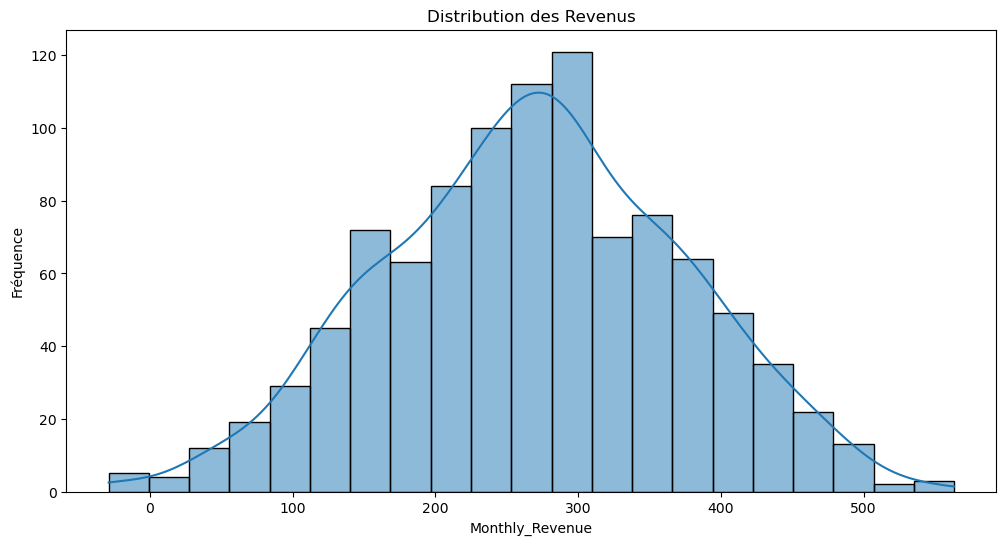

In [6]:
# Distribution des revenus
plt.figure(figsize=(12, 6))
sns.histplot(data['Monthly_Revenue'], kde=True)
plt.xlabel('Monthly_Revenue')
plt.ylabel('Fréquence')
plt.title('Distribution des Revenus')
plt.show()



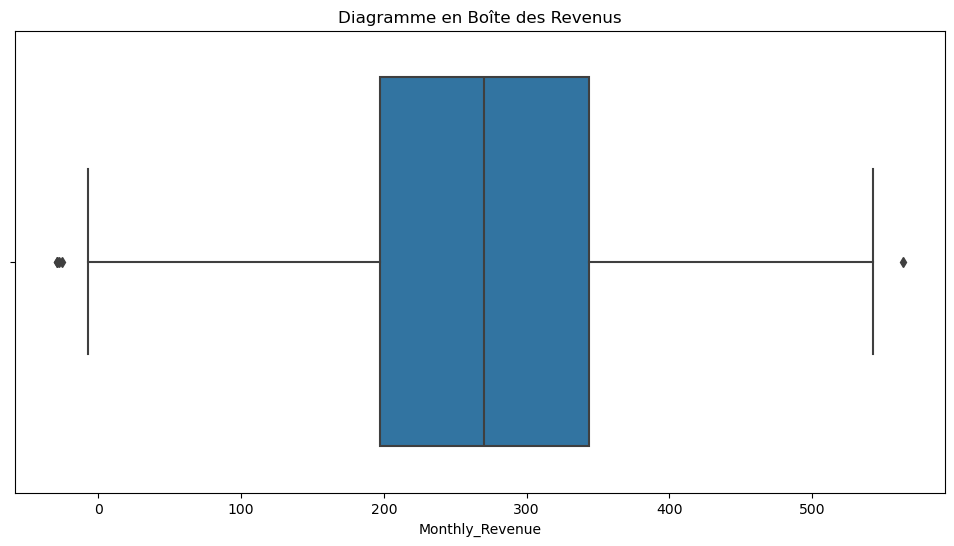

In [7]:
# Diagramme en boîte des revenus
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Monthly_Revenue'])
plt.xlabel('Monthly_Revenue')
plt.title('Diagramme en Boîte des Revenus')
plt.show()

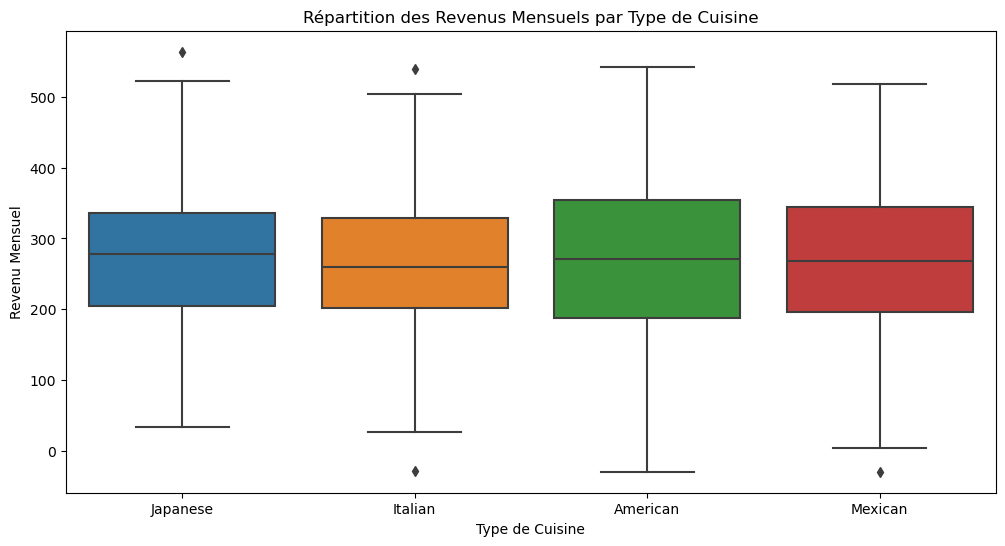

In [8]:
# Répartition des revenus mensuels par type de cuisine
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisine_Type', y='Monthly_Revenue', data=data)
plt.xlabel('Type de Cuisine')
plt.ylabel('Revenu Mensuel')
plt.title('Répartition des Revenus Mensuels par Type de Cuisine')
plt.show()

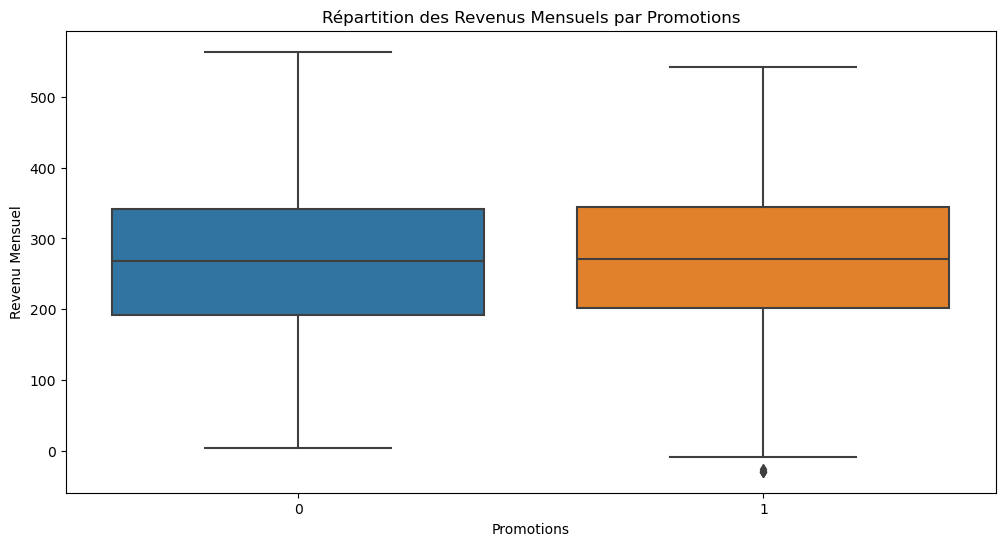

In [9]:
# Répartition des revenus mensuels par promotions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promotions', y='Monthly_Revenue', data=data)
plt.xlabel('Promotions')
plt.ylabel('Revenu Mensuel')
plt.title('Répartition des Revenus Mensuels par Promotions')
plt.show()

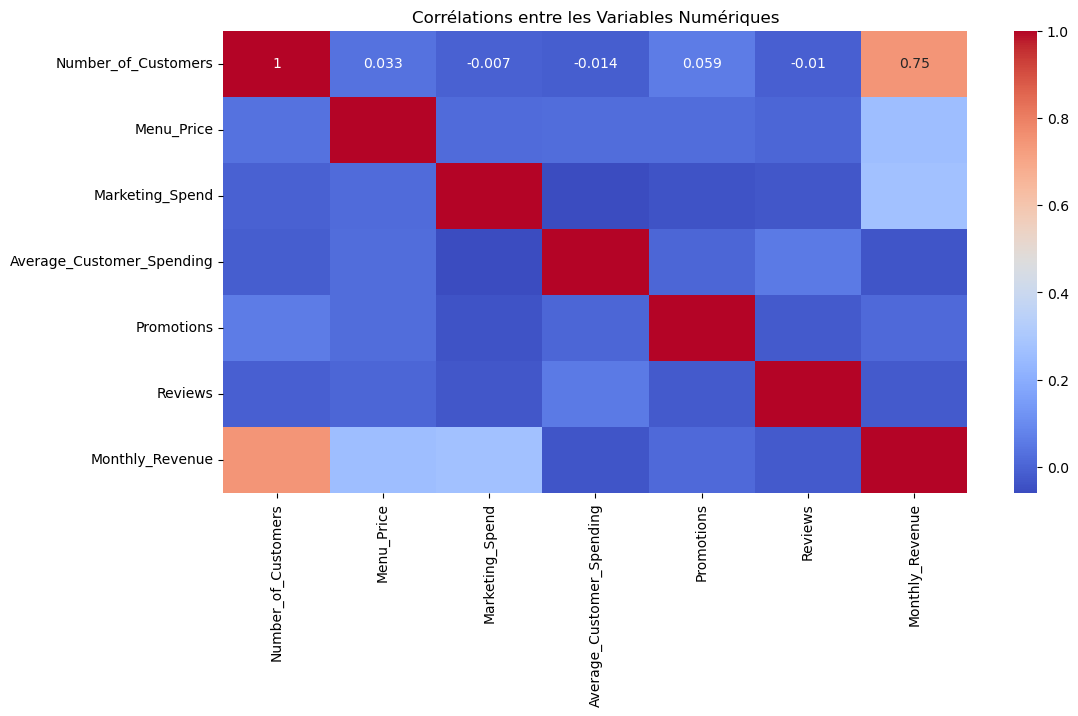

In [10]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_data.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélations entre les Variables Numériques')
plt.show()

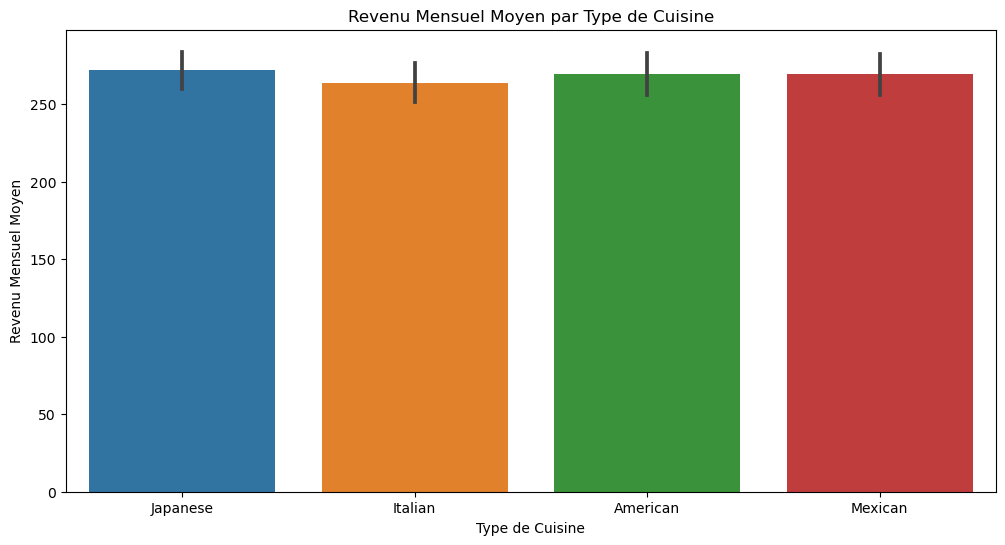

In [11]:
# Bar plot des revenus mensuels moyens par type de cuisine
plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisine_Type', y='Monthly_Revenue', data=data, estimator=lambda x: sum(x) / len(x))
plt.xlabel('Type de Cuisine')
plt.ylabel('Revenu Mensuel Moyen')
plt.title('Revenu Mensuel Moyen par Type de Cuisine')
plt.show()

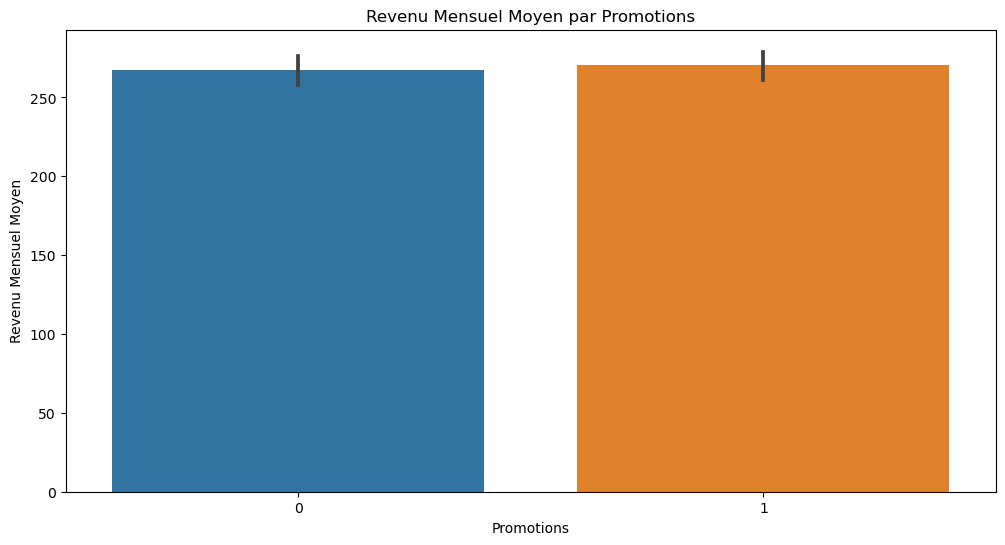

In [12]:
# Bar plot des revenus mensuels moyens par promotions
plt.figure(figsize=(12, 6))
sns.barplot(x='Promotions', y='Monthly_Revenue', data=data, estimator=lambda x: sum(x) / len(x))
plt.xlabel('Promotions')
plt.ylabel('Revenu Mensuel Moyen')
plt.title('Revenu Mensuel Moyen par Promotions')
plt.show()

In [13]:
# Corrélations entre les variables numériques
# Sélectionner uniquement les colonnes numériques pertinentes
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
columns_to_exclude = ['id']  # Ajuster cette liste en fonction du dataset
numeric_columns = [col for col in numeric_columns if col not in columns_to_exclude]
numeric_data = data[numeric_columns]
numeric_data


,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,36.236133,0,45,350.912040
1,24,40.020077,4.577892,17.952562,0,36,221.319091
2,81,41.981485,4.652911,22.600420,1,91,326.529763
3,70,43.005307,4.416053,18.984098,1,59,348.190573
4,30,17.456199,3.475052,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,19.033585,1,40,249.312034
996,31,20.615496,5.822885,17.040990,0,57,110.228767
997,69,17.110656,4.141898,44.649315,0,55,312.212552
998,73,37.664722,3.046556,27.767358,0,23,272.482204


In [14]:
correlation_matrix = numeric_data.corr()
correlation_matrix


,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
Number_of_Customers,1.000000,0.033470,-0.007024,-0.013898,0.058693,-0.010140,0.745239
Menu_Price,0.033470,1.000000,0.016319,0.020808,0.022068,0.003792,0.259579
Marketing_Spend,-0.007024,0.016319,1.000000,-0.058586,-0.041838,-0.031470,0.269929
Average_Customer_Spending,-0.013898,0.020808,-0.058586,1.000000,0.006620,0.054163,-0.035665
Promotions,0.058693,0.022068,-0.041838,0.006620,1.000000,-0.021635,0.014869
Reviews,-0.010140,0.003792,-0.031470,0.054163,-0.021635,1.000000,-0.024946
Monthly_Revenue,0.745239,0.259579,0.269929,-0.035665,0.014869,-0.024946,1.000000


c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

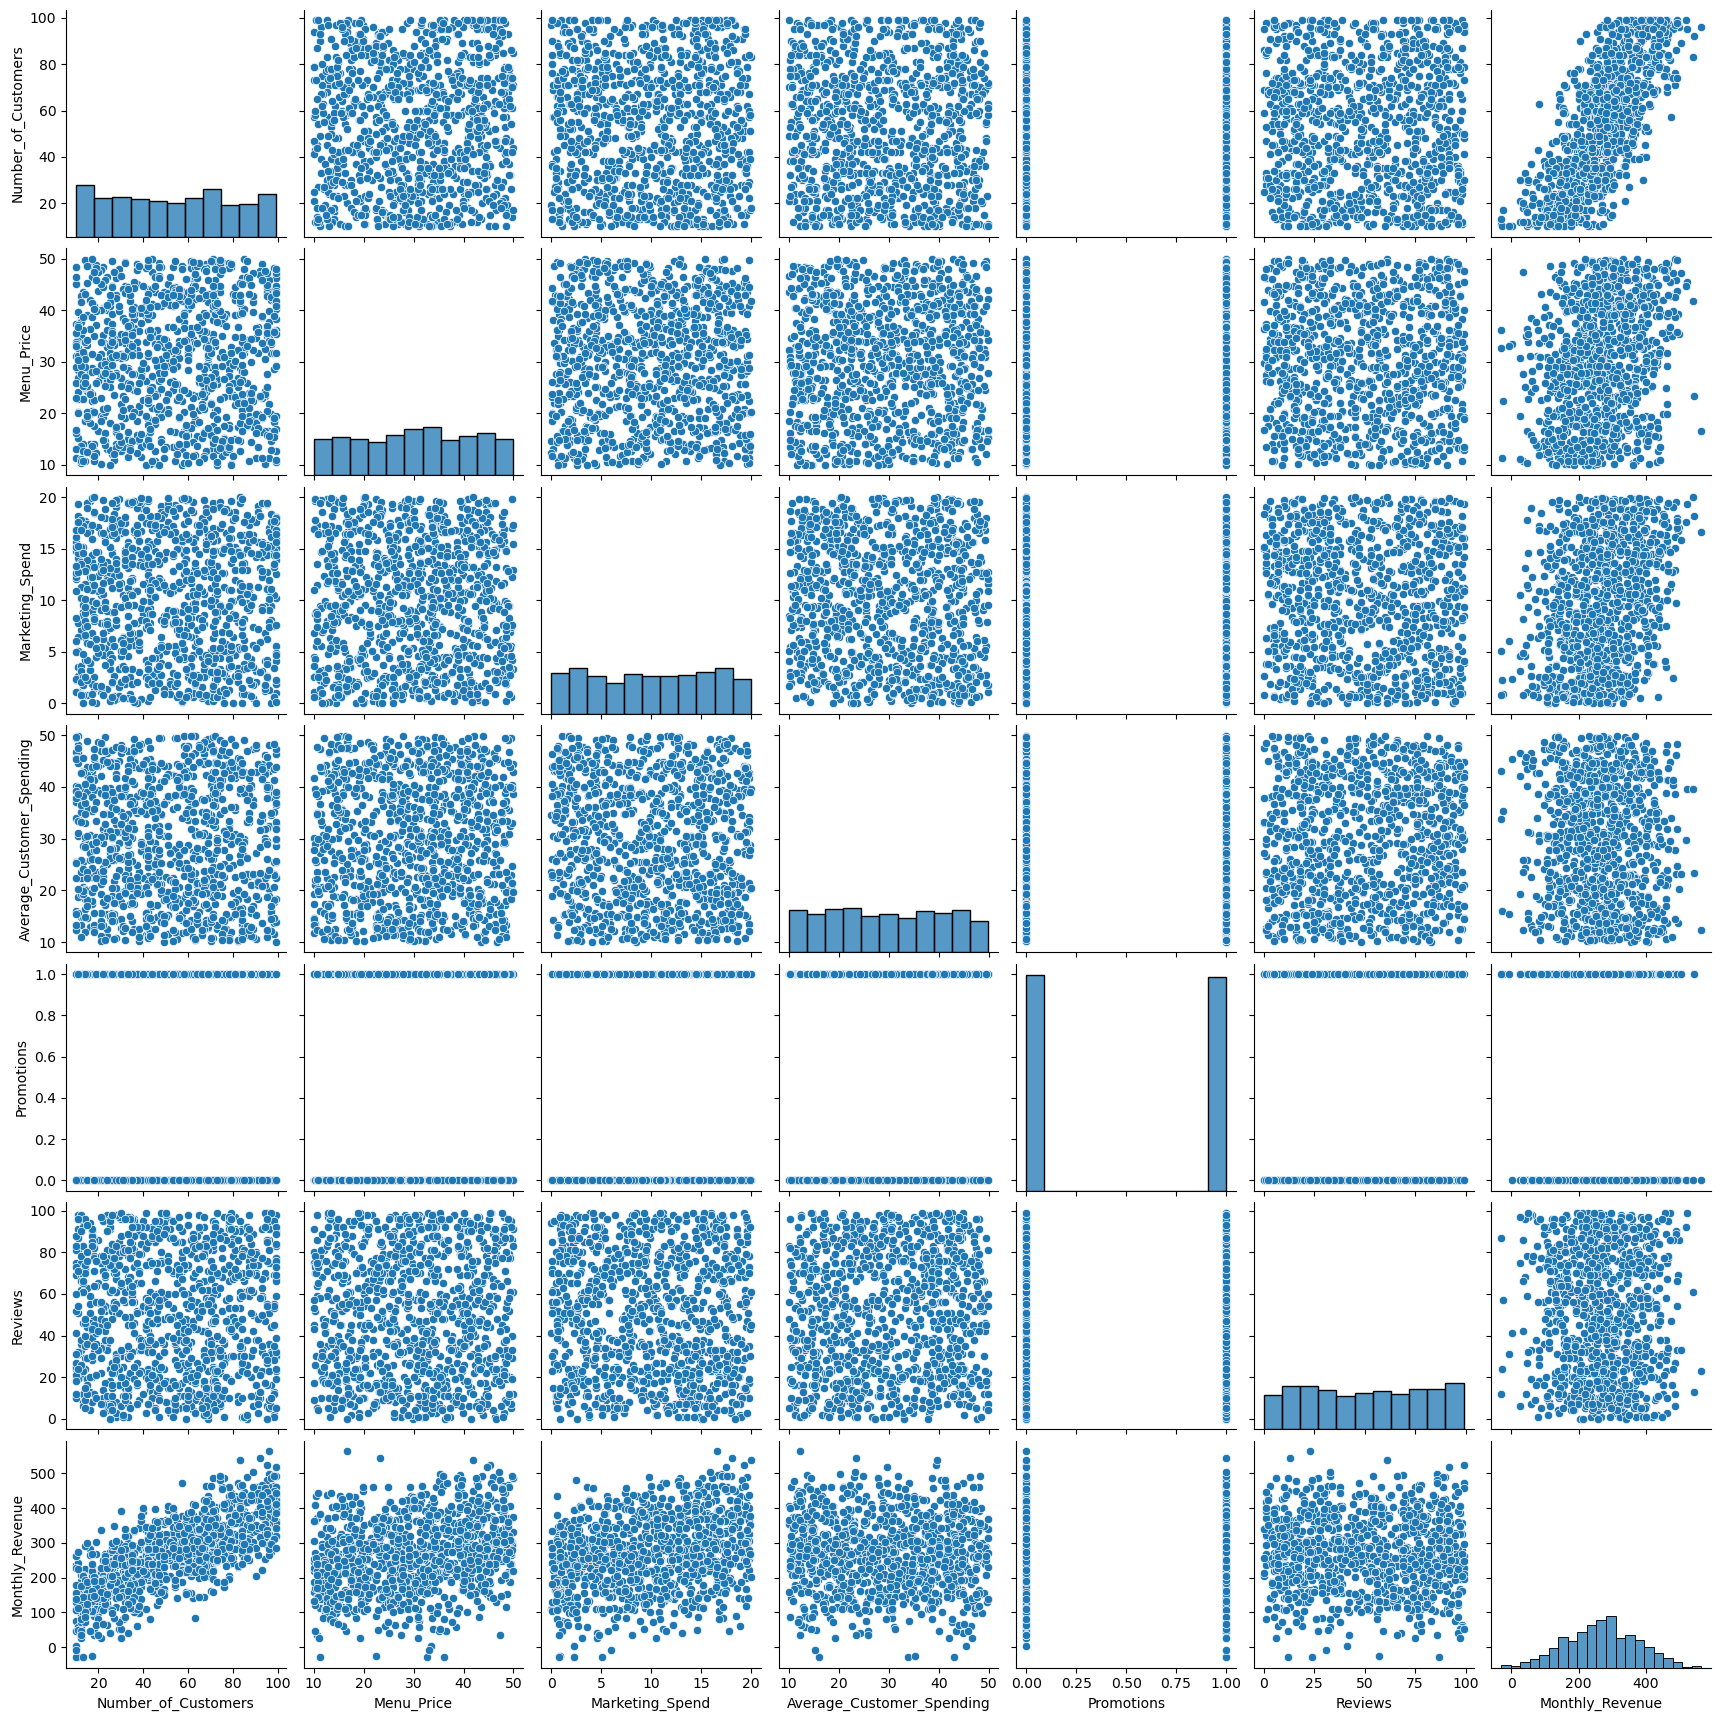

In [15]:
# Pairplot pour visualiser les relations entre les variables numériques
sns.pairplot(numeric_data)
plt.show()

**Modelisation creation du model Machine Learning**

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Séparer les données en ensembles d'entraînement et de test
train_data, test_data = train_test_split(data['Monthly_Revenue'], test_size=0.2, shuffle=False)

# Définir et entraîner le modèle ARIMA
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Résumé du modèle
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:        Monthly_Revenue   No. Observations:                  800
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4901.021
Date:                Wed, 03 Jul 2024   AIC                           9814.042
Time:                        17:21:15   BIC                           9842.143
Sample:                             0   HQIC                          9824.838
                                - 800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8875      0.035    -25.456      0.000      -0.956      -0.819
ar.L2         -0.7378      0.046    -16.012      0.000      -0.828      -0.647
ar.L3         -0.5458      0.050    -10.939      0.0

In [17]:
# Prétraitement des données
# Séparer les caractéristiques (features) et la cible (target)
X = data.drop(columns='Monthly_Revenue')
y = data['Monthly_Revenue']

# Identifier les colonnes numériques et catégorielles
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Créer les transformers pour le prétraitement
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combiner les transformers dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [18]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Entraîner plusieurs modèles de machine learning
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor()
}


results = {}

for name, model in models.items():
    # Créer un pipeline pour chaque modèle
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    # Entraîner le modèle
    pipeline.fit(X_train, y_train)
    
    # Prédire sur l'ensemble de test
    y_pred = pipeline.predict(X_test)

In [20]:
# Évaluer les performances
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
results[name] = {'MSE': mse, 'R2': r2}
    
print(f"{name} - Mean Squared Error: {mse:.2f}, R2 Score: {r2:.2f}")

K-Nearest Neighbors - Mean Squared Error: 4473.20, R2 Score: 0.59


In [21]:
# Sélection du meilleur modèle
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = models[best_model_name]

print(f"Meilleur modèle : {best_model_name} avec un R2 de {results[best_model_name]['R2']:.2f}")

Meilleur modèle : K-Nearest Neighbors avec un R2 de 0.59


In [22]:
# Afficher les résultats des modèles
results_df = pd.DataFrame(results).T
print(results_df)

                             MSE        R2
K-Nearest Neighbors  4473.199619  0.590505


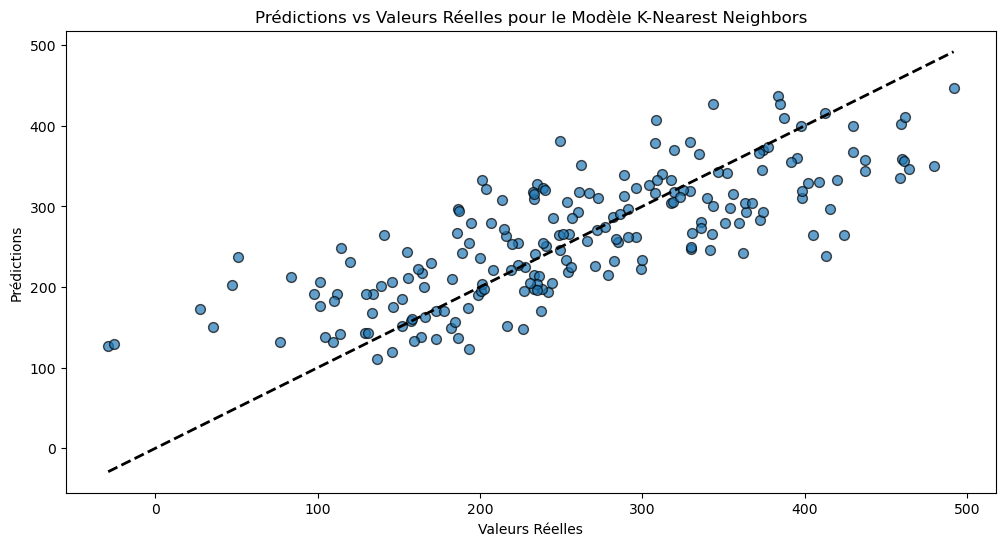

In [23]:
# Visualisation des prédictions vs valeurs réelles pour le meilleur modèle
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', best_model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7, s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title(f'Prédictions vs Valeurs Réelles pour le Modèle {best_model_name}')
plt.show()

**Interprétation des Résultats et Feature Importance**

In [24]:
# Afficher les résultats des modèles
results_df = pd.DataFrame(results).T
print(results_df)

# Afficher les importances des caractéristiques pour le meilleur modèle (si applicable)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = numeric_features.tolist() + preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features).tolist()
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Importance des Caractéristiques')
    plt.show()

                             MSE        R2
K-Nearest Neighbors  4473.199619  0.590505


Validation Croisée

In [26]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Calculer les scores de validation croisée pour le meilleur modèle
cross_val_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print(f'Scores de validation croisée (R2) : {cross_val_scores}')
print(f'Moyenne des scores de validation croisée : {np.mean(cross_val_scores):.2f}')

Scores de validation croisée (R2) : [0.55748583 0.54683325 0.5092146  0.5145429  0.55407962]
Moyenne des scores de validation croisée : 0.54
